# Seminarski rad iz Osnova Mehanike - Brod na reci (6.4.1) 

## Opis kretanja u 2D

### Pozicija

- Kako bismo opisali kretanje u 2 ili više dimenzija neophodno je da umesto skalara korisitimo vektore. 

- Poziciju objekta možemo tretirati kao funkciju $r(t)$ koja preslikava vremenski trenutak $t$ u vektor $p = (x, y)$ 

- Iako nas interesuju funkcije $f(t)$ u odnosu na vreme, mi ćemo najčešće koristiti njima odgovarajuće nizove numeričkih podataka da bismo predstavili prirodne pojave što znači da je $f_{i} = f(t_{i})$


### Pomeraj

- Promenu pozicije u odnosu na vreme nazivamo **pomerajem** 
    - $\large{\Delta r(t_{n}) = r(t_{n} + \Delta t) - r(t_{n})}$
    - gde je $\Delta t$ najčešće konstanta razlika u vremenskim intervalima u kojima smo beležili 
- Pomeraj je 2D vektor jer je pozicija 2D vektor
    - Ima svoj pravac i intenzitet
- Pomeraj ne zavisi od izbora koordinatnog početka 


### Brzina
- Srednja brzina od vremenskog trenutka $t_{n}$ do $t_{n + 1} = t_{n} + \Delta t$ zavisi od pomeraja i definiše se kao
    - $\large{\bar{v}(t) = \frac{r(t_{n} + \Delta t) - r(t_{n})}{\Delta t}} = \frac{\Delta r(t_{n})}{\Delta t}$
- Kako sve više smanjujemo $\Delta t$ tako se intenzitet vektora pomeraja smanjuje dok pravac prilazi tangenti krive koja opisuje kretanje
<img src="velocity_lim.png" width="50%">

- **Stopa promene** vektora **pozicije** u odnosu na vreme se naziva trenutna brzina
    - Definišemo ju je kao limes vektora srednje brzine kada $\Delta t \rightarrow 0$ 
    - $\large{v(t) = \lim_{\Delta t \rightarrow 0}{\frac{\Delta r(t)}{\Delta t}} = \lim_{\Delta t \rightarrow 0}{\frac{r(t + \Delta t) - r(t)}{\Delta t}} = \frac{dr}{\Delta t} = \dot{r}}$


### Ubrzanje

- Srednje ubrzanje od vremenskog trenutka trenutka $t_{n}$ do $t_{n + 1} = t_{n} + \Delta t$ zavisi od brzine i definiše se kao
    - $\large{\bar{a}(t) = \frac{v(t_{n} + \Delta t) - v(t_{n})}{\Delta t}}$

- **Stopa promene** vektora **brzine** u odnosu na vreme se naziva trenutno ubrzanje
    - Definišemo ga je kao limes vektora srednjeg ubrzanja kada $\Delta t \rightarrow 0$ 
    - $\large{a(t) = \lim_{\Delta t \rightarrow 0}{\frac{v(t + \Delta t) - v(t)}{\Delta t}} = \frac{dv}{\Delta t} = \dot{v} = \ddot{r}}$

## Računanje kretanja u 2D

### Diskretna integracija
- Neka imamo niz vektora ubrzanja zabeleženih u različitim trenucima $A = a(t_{i})$
- Pomoću $A$ želimo da pronađemo niz vektora brzina $V = v(t_{i})$ i niz vektora pozicija $R = r(t_{i})$
- Transformisanjem jednačine za srednje ubrzanje dobijamo 
    - $\large{v(t_{i} + \Delta t) \simeq v(t_{i}) + \Delta t \cdot a(t_{i})}$
    - S tim što smo prosečno ubrzanje iz početne jednačine aproksimirali trenutnim $\bar{a}(t_{i}) \simeq a(t_{i})$
- Kada isti postupak primenimo na srednju brzinu i poziciju dobijamo
    - $\large{r(t_{i} + \Delta t) \simeq r(t_{i}) + \Delta t \cdot v(t_{i})}$
    - S tim što smo prosečnu brzinu iz početne jednačine aproksimirali trenutnom $\bar{v}(t_{i}) \simeq v(t_{i})$

### Ojlerov metod

- Korišćenjem gore navedenih jednačina dobijamo iterativan način računanja diskretne integracije
$$\large{v(t_{i} + \Delta t) \simeq v(t_{i}) + \Delta t \cdot a(t_{i})}$$
$$\large{r(t_{i} + \Delta t) \simeq r(t_{i}) + \Delta t \cdot v(t_{i})}$$

In [1]:
import numpy as np
from numpy import ndarray
from matplotlib import pyplot as plt
from typing import Tuple, Optional

In [41]:
def euler(A: ndarray, dt: float, v0: Optional[float] = None, r0: Optional[float] = None) -> Tuple[ndarray, ndarray]:
    # postavljanjem sve na 0 handle-uje se slučaj i - 1 == 0 i kada nisu prosleđeni v0 i r0 
    V = np.zeros(A.shape)
    if v0 is not None:
        V[0] = v0
    R = np.zeros(A.shape)
    if r0 is not None:
        R[0] = r0
    for i, a in enumerate(A):
        V[i] = V[i - 1] + dt * a
        R[i] = R[i - 1] + dt * V[i - 1]
    return (V, R)

### Ojler-Kromerov metod
- Modifikacijom bolje aproksimacije za brzinu u drugoj jednačini Ojlerovog metoda dobijamo Ojler-Kromeverov metod
$$\large{v(t_{i} + \Delta t) \simeq v(t_{i}) + \Delta t \cdot a(t_{i})}$$
$$\large{r(t_{i} + \Delta t) \simeq r(t_{i}) + \Delta t \cdot v(t_{i} + \Delta t)}$$
- Postižemo veću preciznost i stabilnost u odnosu na Ojlerov metod

In [42]:
def euler_cromer(A: ndarray, dt: float, v0: Optional[float] = None, r0: Optional[float] = None) -> Tuple[ndarray, ndarray]:
    # postavljanjem sve na 0 handle-uje se slučaj i - 1 == 0 i kada nisu prosleđeni v0 i r0 
    V = np.zeros(A.shape)
    if v0 is not None:
        V[0] = v0
    R = np.zeros(A.shape)
    if r0 is not None:
        R[0] = r0
    for i, a in enumerate(A):
        V[i] = V[i - 1] + dt * a
        R[i] = R[i - 1] + dt * V[i]
    return (V, R)

## Referentni sistemi

- Kretanje nekog objekta osmatramo u odnosu na referentni sistem
- Neka su $S$ i $S'$ referentni sistemi gde se $S'$ kreće konstantnom brzinom u odnosu na $S$
- Neka su brzine nekog objekta u odnosu na $S$ i $S'$ redom $v$ i $v'$ i neka je $u$ konstanta brzina kretanja $S'$ u odnosu na $S$
    - brzine su u relaciji $v = u + v'$ 
- Pošto se $S'$ kreće konstantnom brzinom u odnosu na $S$ onda je njegova stopa promene brzine odnosno ubrzanje jednako 0 tj. $\frac{du}{dt} = 0$
    - iz čega sledi $a = a'$   
    - sisteme koji se kreću konstantnom brzinom nazivamo **inercionim sistemima**

# Brod na reci

## Opis problema

- Vozimo brod po reci koja se kreće nizvodno briznom $1\frac{m}{s}$
- Istražićemo kretanje broda u različitim scenarijima
    - Vožnja direktno ka drugoj obali 
    - Vožnja sa konstantnom brzinom
    - Vožnja sa promenljivom brzinom



### Skica
- <img src="boat.png" height="250.5">
- Nacrtali smo brod, reku i obalu i obeležili neophodne referentne sisteme
    - Sa $S$ smo obeležili referentni sistem na obali
    - Sa $S'$ smo obeležili referentni sistem koji prati tok reke
    - Reka plovi u smeru $x$ ose
    - $x$ i $x'$ ose su paralelne


### Pozicija broda

- Pozicija broda u sistemu $S$ je $r(t)$
- Pozicija broda u sistemu $S'$ je $r'(t)$
- Pozicija sistema $S'$ u odnosu na sistem $S$ je $R(t)$
- Lako možemo da se prebacujemo iz sistema $S$ u $S'$ zbog sledećeg odnosa
    - $\large{r(t) = R(t) + r'(t)}$


### Brzina broda

- Neka nam je poznata brzina broda $v_{b}'$ u odnosu na $S'$
- Uzimanjem izvoda po vremenu funkcije pozicije $r(t)$ u odnosu na $S$ dobijamo
    - $\large{\frac{d r_{b}}{dt} = \frac{dR}{dt} + \frac{dr_{b}'}{dt} = u + v_{b}' = v_{b}}$
    - gde je $u$ brzina referentnog sistema $S'$ u odnosu na $S$

### Vožnja direktno ka drugoj obali 

- Želimo da pronađemo kojom brzinom je neophodno da se brod kreće da bi prešao direktno sa obale na obalu tj. da se nimalo ne pomeri nizvodno
- Znamo da je veza između brzina u referentnim sistemima $S$ i $S'$ data sa $v_{b} = u + v_{b}'$
    - $v_{b, x} = u_{x} + v_{b, x}'$  
    - $v_{b, y} = u_{y} + v_{b, y}' = 0 + v_{b, y}' = v_{b, y}'$  
- Da bismo se kretali direktno sa obale na obalu neophodno je da brzina kretanja broda u odnosu na referentni $S$ po $x$ osi bude $0$
    - $v_{b, x} = u_{x} + v_{b, x}'$  
    - $0 = u_{x} + v_{b, x}'$  
    - $v_{b, x}' = -u_{x}$  

### Vožnja sa konstantnom brzinom

- Ako se brod kreće konstantnom brzinom $v_{b}'$ u odnosu na referentni sistem $S'$ koja će biti njegova pozicija nakon vremena $t$?
- Nije bitan izbor referenotnog sistema u odnosu na koji ćemo pronaći poziciju jer uvek možemo jednostavno da transformišemo pomoću $r(t) = R(t) + r'(t)$
- Neka izaberemo referentni sistem $S$ 
    - zbog toga je neophodno da koristimo brzinu u $S$ tj. $v_{b} = u + v_{b}'$
- Formalnom integracijom brzine dobijamo
    - $\large{r(t_{0}) + \int_{t_{0}}^{t_{1}}v_{b}(t)dt}$
    - $\large{r(t_{0}) + \int_{t_{0}}^{t_{1}}(u + v_{b}')dt}$
    - $\large{r(t_{0}) + (u + v_{b}')(t_{1} - t_{0})} = r_{b}(t)$

### Vožnja sa promenljivom brzinom

- Brzina broda u odnosnu na referetni sistem $S'$ zabeležena je brzinomerom 
    - Podaci su sačuvani u `boat_velocity.txt` fajlu u formatu $(t, x, y)$ gde je $t$ vreme, a $x$ i $y$ komponente vektora brzine
- Poziciju $r(t_{i})$ pronalazimo integracijom $v(t_{i})$ pomoću Ojlerove metode

In [2]:
# Učitavamo podatke i definišemo parametre zadatka
t, x, y = np.loadtxt('boat_velocity.txt', usecols=[0, 1, 2], unpack=True)

u = np.array([0.0, -5.0])
n = len(t)
dt = t[1] - t[0]

V = np.zeros((n, 2), dtype=float)
V[:, 0] = x
V[:, 1] = y

V

array([[ 7.0709177 , -7.0709176 ],
       [ 7.0712709 , -7.0712276 ],
       [ 7.0781831 , -7.0780151 ],
       ...,
       [ 0.60911211,  7.4922526 ],
       [ 0.6021624 ,  7.4836209 ],
       [ 0.59613728,  7.4749129 ]])

In [4]:
# Ojlerovom metodom računamo niz vektora pozicija
def euler_boat(V: ndarray, u: ndarray, dt: float) -> ndarray:
    R = np.zeros(V.shape)
    for i, v in enumerate(V):
        R[i] = R[i - 1] + dt * (u + v)
    return R

In [5]:

R_moving = euler_boat(V, u, dt)

R_moving

array([[  0.70709177,  -1.20709176],
       [  1.41421886,  -2.41421452],
       [  2.12203717,  -3.62201603],
       ...,
       [359.2613342 , -89.15204813],
       [359.32155044, -88.90368604],
       [359.38116417, -88.65619475]])

In [6]:
R_stationary = euler_boat(V, np.zeros(u.shape), dt)

R_stationary

array([[  0.70709177,  -0.70709176],
       [  1.41421886,  -1.41421452],
       [  2.12203717,  -2.12201603],
       ...,
       [359.2613342 , 185.34795187],
       [359.32155044, 186.09631396],
       [359.38116417, 186.84380525]])

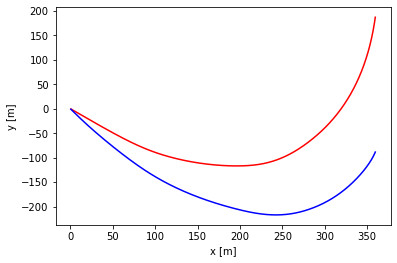

In [7]:
# Plotujemo podatke
plt.plot(R_stationary[:, 0], R_stationary[:, 1], 'r')
plt.plot(R_moving[:, 0], R_moving[:, 1], 'b')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.show()